# Import/examine CrossCheck dataset

In [ ]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [52]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets

In [70]:
importlib.reload(datasets)

crosscheck = datasets.CrossCheck()
crosscheck.data_raw.head()

,study_id,eureka_id,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_ep_4,act_on_bike_ep_0,act_on_bike_ep_1,...,unlock_duration_ep_0,unlock_duration_ep_1,unlock_duration_ep_2,unlock_duration_ep_3,unlock_duration_ep_4,unlock_num_ep_0,unlock_num_ep_1,unlock_num_ep_2,unlock_num_ep_3,unlock_num_ep_4
0,-1,u004,20150122,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,-1,u004,20150123,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,-1,u004,20150124,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,-1,u004,20150125,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,-1,u004,20150126,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


<AxesSubplot: xlabel='date', ylabel='study_id'>

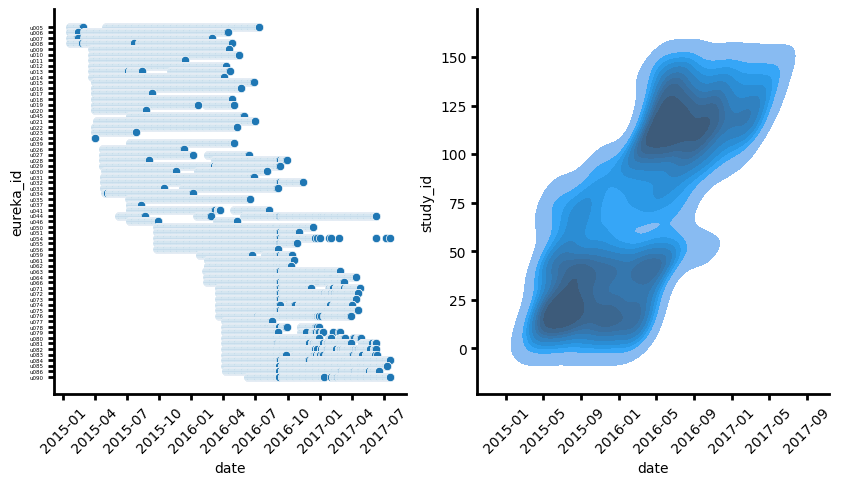

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(
    y='eureka_id',
    x='date',
    data=crosscheck.data,
    ax=axes[0]
)
fa.despine_thicken_axes(axes[0], fontsize=10, y_tick_fontsize=4, x_rotation=45)

sns.kdeplot(
    y='study_id',
    x='date',
    data=crosscheck.data,
    ax=axes[1],
    fill=True
)
fa.despine_thicken_axes(axes[1], fontsize=10, x_rotation=45)


In [50]:
daily_passive_features = [
    'act_in_vehicle_ep_0',
    'act_on_bike_ep_0',
    'act_on_foot_ep_0',
    'act_still_ep_0',
    'act_tilting_ep_0',
    'act_unknown_ep_0',
    'audio_amp_mean_ep_0',
    'audio_convo_duration_ep_0',
    'audio_convo_num_ep_0',
    'audio_voice_ep_0',
    'call_in_duration_ep_0',
    'call_in_num_ep_0',
    'call_miss_num_ep_0',
    'call_out_duration_ep_0',
    'call_out_num_ep_0',
    'light_mean_ep_0',
    'light_mean_ep_1',
    'light_mean_ep_4',
    'light_std_ep_0',
    'loc_dist_ep_0',
    'loc_visit_num_ep_0',
    'sms_in_num_ep_0',
    'sms_out_num_ep_0',
    'unlock_duration_ep_0',
    'unlock_num_ep_0'
]

In [72]:
from pathlib import Path
from tqdm.auto import tqdm
importlib.reload(plots)

#daily_passive_features = [c for c in crosscheck.feature_cols if c[-2:] == '_0']
plot_features = [
    'ema_neg_score',
    'ema_VOICES',
    'ema_SEEING_THINGS',
    'ema_STRESSED',
    'ema_DEPRESSED',
    'ema_HARM',
    'ema_pos_score',
    'ema_HOPEFUL',
    'ema_CALM',
    'ema_SLEEPING',
    'ema_SOCIAL',
    'ema_THINK',
    'sleep_duration',
    'quality_activity',
    'quality_audio',
    'quality_gps_on',
    'quality_light',
    'quality_loc',
    *daily_passive_features
]

fig_dir = Path('output', 'crosscheck', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)

# Plot the data for each subject
for sid, subject_data in tqdm(crosscheck.data.groupby('subject_id')):
    fig, axes = plots.lineplot_features(
        subject_data,
        plot_features,
        scatter=True,
    )
    fig.suptitle(f'Subject {sid}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()

100%|██████████| 61/61 [07:21<00:00,  7.24s/it]


In [49]:
for f in crosscheck.feature_cols:
    if f.startswith('ema_'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('act_'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('sleep_'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('light_'):
        print(
            '"' + f + '": "#DDAA33",',
        )
    elif f.startswith('audio_'):
        print(
            '"' + f + '": "#88CCEE",',
        )
    elif f.startswith('call_'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('loc_'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )


"act_in_vehicle_ep_0": "#228833",
"act_in_vehicle_ep_1": "#228833",
"act_in_vehicle_ep_2": "#228833",
"act_in_vehicle_ep_3": "#228833",
"act_in_vehicle_ep_4": "#228833",
"act_on_bike_ep_0": "#228833",
"act_on_bike_ep_1": "#228833",
"act_on_bike_ep_2": "#228833",
"act_on_bike_ep_3": "#228833",
"act_on_bike_ep_4": "#228833",
"act_on_foot_ep_0": "#228833",
"act_on_foot_ep_1": "#228833",
"act_on_foot_ep_2": "#228833",
"act_on_foot_ep_3": "#228833",
"act_on_foot_ep_4": "#228833",
"act_running_ep_0": "#228833",
"act_running_ep_1": "#228833",
"act_running_ep_2": "#228833",
"act_running_ep_3": "#228833",
"act_running_ep_4": "#228833",
"act_still_ep_0": "#228833",
"act_still_ep_1": "#228833",
"act_still_ep_2": "#228833",
"act_still_ep_3": "#228833",
"act_still_ep_4": "#228833",
"act_tilting_ep_0": "#228833",
"act_tilting_ep_1": "#228833",
"act_tilting_ep_2": "#228833",
"act_tilting_ep_3": "#228833",
"act_tilting_ep_4": "#228833",
"act_unknown_ep_0": "#228833",
"act_unknown_ep_1": "#228833",
"ac